# Algebra Lineal

### Vectores y Matrices

Los vectores son elementos fundamentales que representan magnitudes con dirección. En aplicaciones prácticas, se utilizan para modelar características, fuerzas, velocidades o cualquier conjunto ordenado de valores numéricos. Las matrices, colecciones rectangulares de números, permiten representar transformaciones lineales y sistemas de ecuaciones.

**La importancia aplicada** radica en que casi cualquier conjunto de datos multidimensionales puede representarse como una matriz, donde cada fila podría ser una observación y cada columna una característica.

In [9]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Crear matrices y vectores
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])

### Operaciones Matriciales
Más allá de la suma y multiplicación básicas, operaciones como:

Producto punto: mide similitud entre vectores
Producto cruz: genera vectores perpendiculares
Multiplicación matriz-vector: aplica transformaciones lineales
Multiplicación matriz-matriz: compone transformaciones
Transpuesta: intercambia filas por columnas
Inversa: "deshace" una transformación lineal

Estas operaciones son fundamentales en algoritmos de aprendizaje automático, procesamiento de imágenes y sistemas físicos.

In [10]:
# Operaciones básicas
producto_matriz = A @ A  # Multiplicación de matrices
producto_vector = A @ b  # Multiplicación matriz-vector
transpuesta = A.T  # Transpuesta
try:
    inversa = np.linalg.inv(A)  # Inversa (si existe)
    print("Inversa existe")
except np.linalg.LinAlgError:
    print("Matriz singular, no tiene inversa")

Inversa existe


### Descomposición de Matrices
Las descomposiciones revelan la estructura intrínseca de una matriz:

* SVD (Descomposición en Valores Singulares): Descompone A = UΣV*, donde U y V son matrices ortogonales y Σ contiene los valores singulares. Es crucial para compresión de datos, reducción dimensional y sistemas de recomendación.
* Descomposición QR: Expresa A = QR donde Q es ortogonal y R triangular superior. Utilizada en resolver sistemas lineales y mínimos cuadrados.
* Descomposición Cholesky: Para matrices simétricas definidas positivas, A = LL* donde L es triangular inferior. Eficiente para resolver sistemas y simulaciones.
* Descomposición LU: Factoriza A = LU donde L es triangular inferior y U triangular superior. Útil para resolver sistemas de ecuaciones eficientemente.

In [11]:
# Descomposiciones
U, S, Vt = np.linalg.svd(A)  # SVD
Q, R = np.linalg.qr(A)  # QR
try:
    L = np.linalg.cholesky(A @ A.T)  # Cholesky (para matrices simétricas definidas positivas)
except np.linalg.LinAlgError:
    print("No se puede aplicar Cholesky")
P, L, U = la.lu(A)  # LU (usando scipy)

### Valores y Vectores Propios
Cuando una matriz A transforma un vector v y el resultado es paralelo al vector original (Av = λv), decimos que v es un vector propio con valor propio λ. Esto revela:

* Direcciones invariantes bajo transformación (solo cambian en escala)
* Estabilidad de sistemas dinámicos
* Componentes principales en análisis de datos
* Propiedades físicas de sistemas (modos de vibración, estados cuánticos)

In [12]:
# Valores y vectores propios
valores, vectores = np.linalg.eig(A)

### Visualización de transformación lineal

In [13]:
# Visualización de transformación lineal
def plot_transformation(A):
    # Vectores unitarios originales
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    
    # Vectores transformados
    t_e1 = A @ e1
    t_e2 = A @ e2
    
    plt.figure(figsize=(10, 10))
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Dibujar vectores originales
    plt.arrow(0, 0, e1[0], e1[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='e1')
    plt.arrow(0, 0, e2[0], e2[1], head_width=0.1, head_length=0.1, fc='green', ec='green', label='e2')
    
    # Dibujar vectores transformados
    plt.arrow(0, 0, t_e1[0], t_e1[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='A·e1')
    plt.arrow(0, 0, t_e2[0], t_e2[1], head_width=0.1, head_length=0.1, fc='purple', ec='purple', label='A·e2')
    
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.title(f'Transformación lineal por matriz A = {A}')
    plt.show()

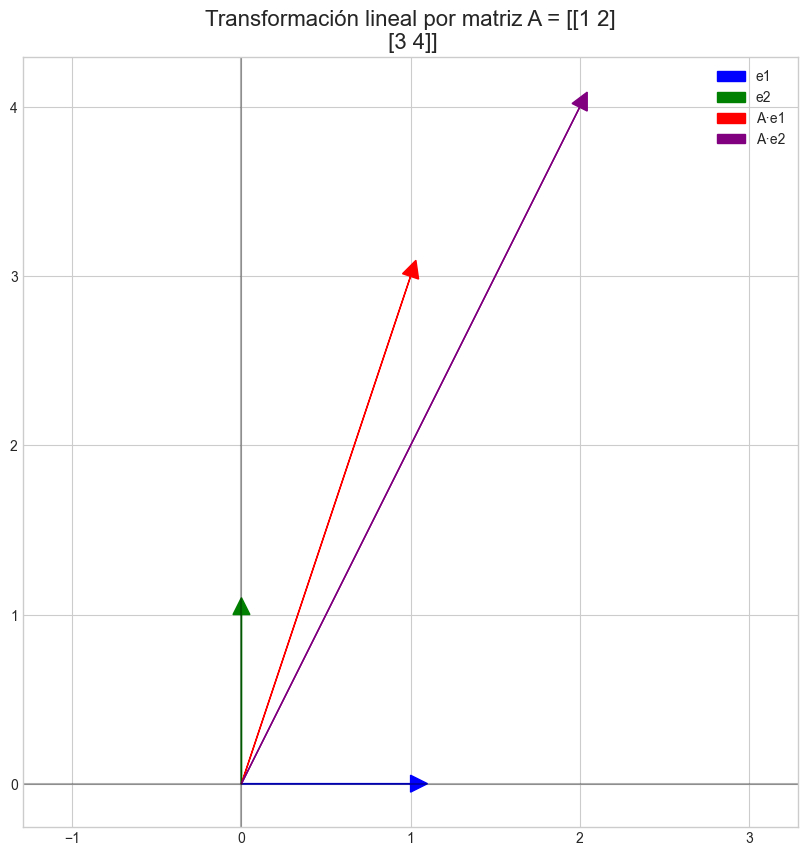

In [14]:
plot_transformation(A)

### Flujo de Trabajo Avanzado

1. Representación de datos:

    * Estructurar datos como matrices (filas: observaciones, columnas: características)
    * Normalizar/estandarizar cuando sea necesario
    * Considerar representaciones dispersas para datos de gran escala


2. Preprocesamiento usando álgebra lineal:

    * Centrar datos (restar la media)
    * Escalar características (dividir por desviación estándar)
    * Aplicar transformaciones lineales para decorrelacionar variables


3. Reducción dimensional:

    * Análisis de Componentes Principales (PCA) usando SVD
    * Seleccionar componentes basándose en la varianza explicada
    * Proyectar datos al subespacio de menor dimensión


4. Resolución de sistemas lineales:

    * Determinar el método óptimo según propiedades de la matriz (simetría, condicionamiento)
    * Usar descomposiciones apropiadas (Cholesky para sistemas SPD, QR para mínimos cuadrados)
    * Implementar métodos iterativos para sistemas grandes y dispersos


5. Análisis e interpretación:

    * Examinar valores/vectores propios para identificar direcciones principales
    * Usar normas matriciales para medir errores y convergencia
    * Visualizar transformaciones para comprender geometría subyacente

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy import linalg

In [16]:
# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_r")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Configurar semilla para reproducibilidad
np.random.seed(42)

In [17]:
# ===============================================
# PARTE 1: GENERACIÓN DE DATOS SIMULADOS
# ===============================================

# Constantes
NUM_EMPLEADOS = 150
NUM_DIAS = 90
AREAS = ['Almacenamiento', 'Distribución', 'Transporte', 'Carga', 'Embalaje', 'Inventario']
RAZONES_AUSENCIA = ['Enfermedad', 'Emergencia familiar', 'Cita médica', 'Problemas de transporte', 'Personal']
FECHA_INICIO = datetime(2024, 1, 1)

print("1. GENERACIÓN DE DATOS DE ASISTENCIA")
print(f"   - Empleados: {NUM_EMPLEADOS}")
print(f"   - Período: {NUM_DIAS} días desde {FECHA_INICIO.strftime('%Y-%m-%d')}")
print(f"   - Áreas: {', '.join(AREAS)}")

1. GENERACIÓN DE DATOS DE ASISTENCIA
   - Empleados: 150
   - Período: 90 días desde 2024-01-01
   - Áreas: Almacenamiento, Distribución, Transporte, Carga, Embalaje, Inventario


In [18]:
# Generar datos de empleados
ids_empleados = range(1, NUM_EMPLEADOS + 1)
nombres = ['Juan', 'María', 'Carlos', 'Ana', 'Luis', 'Laura', 'Miguel', 'Sofía', 'José', 'Claudia']
apellidos = ['García', 'Rodríguez', 'Martínez', 'López', 'González', 'Pérez', 'Sánchez', 'Ramírez', 'Torres', 'Flores']

empleados = []
for emp_id in ids_empleados:
    nombre = random.choice(nombres)
    apellido = random.choice(apellidos)
    area = random.choice(AREAS)
    empleados.append({
        'id_empleado': emp_id,
        'nombre': f"{nombre} {apellido}",
        'area': area
    })

In [19]:
# Crear DataFrame de empleados
df_empleados = pd.DataFrame(empleados)

# Generar número de ausencias por empleado con distribución normal (media 3, desv. estándar 0.5)
# Esta será la "verdad fundamental" sobre cuántos días falta cada empleado
ausencias_por_empleado = np.round(np.random.normal(3, 0.5, NUM_EMPLEADOS)).astype(int)
# Asegurar que no haya ausencias negativas
ausencias_por_empleado = np.maximum(ausencias_por_empleado, 0)

# Generar registros diarios
registros_asistencia = []

for emp_id in ids_empleados:
    # Seleccionar aleatoriamente días de ausencia para este empleado
    dias_ausencia = np.random.choice(range(NUM_DIAS), ausencias_por_empleado[emp_id-1], replace=False)
    
    for dia in range(NUM_DIAS):
        fecha = FECHA_INICIO + timedelta(days=dia)
        
        if dia in dias_ausencia:
            # Día de ausencia
            es_justificada = random.random() > 0.3  # 70% de ausencias son justificadas
            estado = 'Ausencia justificada' if es_justificada else 'Ausencia injustificada'
            motivo = random.choice(RAZONES_AUSENCIA) if es_justificada else 'Sin justificación'
            hora_entrada = None
            hora_salida = None
        else:
            # Día normal de trabajo
            # Horario base con variación
            entrada_base = datetime.combine(fecha.date(), datetime.strptime('08:00:00', '%H:%M:%S').time())
            variacion_entrada = timedelta(minutes=random.randint(-25, 30))
            hora_entrada = entrada_base + variacion_entrada
            
            salida_base = datetime.combine(fecha.date(), datetime.strptime('17:00:00', '%H:%M:%S').time())
            variacion_salida = timedelta(minutes=random.randint(-20, 45))
            hora_salida = salida_base + variacion_salida
            
            estado = 'Presente'
            motivo = None
        
        registros_asistencia.append({
            'id_empleado': emp_id,
            'fecha': fecha,
            'hora_entrada': hora_entrada,
            'hora_salida': hora_salida,
            'estado': estado,
            'motivo_ausencia': motivo
        })

# Crear DataFrame de asistencia
df_asistencia = pd.DataFrame(registros_asistencia)

In [20]:
# Unir con información de empleados
datos_completos = pd.merge(df_asistencia, df_empleados, on='id_empleado')

# Añadir características adicionales útiles para el análisis
datos_completos['dia_semana'] = datos_completos['fecha'].dt.day_name()
datos_completos['mes'] = datos_completos['fecha'].dt.month
datos_completos['dia_mes'] = datos_completos['fecha'].dt.day
datos_completos['es_ausencia'] = datos_completos['estado'].str.contains('Ausencia')
datos_completos['es_ausencia_justificada'] = datos_completos['estado'] == 'Ausencia justificada'
datos_completos['es_ausencia_injustificada'] = datos_completos['estado'] == 'Ausencia injustificada'

# Calcular horas trabajadas si hay entrada y salida
def calcular_horas(fila):
    if pd.notnull(fila['hora_entrada']) and pd.notnull(fila['hora_salida']):
        return (fila['hora_salida'] - fila['hora_entrada']).total_seconds() / 3600
    else:
        return 0

datos_completos['horas_trabajadas'] = datos_completos.apply(calcular_horas, axis=1)

# Estadísticas básicas
print("\n2. ESTADÍSTICAS BÁSICAS DE LOS DATOS GENERADOS")
print(f"   - Total de registros: {len(datos_completos)}")
total_ausencias = datos_completos[datos_completos['es_ausencia']].shape[0]
ausencias_justificadas = datos_completos[datos_completos['es_ausencia_justificada']].shape[0]
ausencias_injustificadas = datos_completos[datos_completos['es_ausencia_injustificada']].shape[0]

print(f"   - Total ausencias: {total_ausencias} ({total_ausencias/len(datos_completos)*100:.2f}%)")
print(f"   - Ausencias justificadas: {ausencias_justificadas} ({ausencias_justificadas/total_ausencias*100:.1f}%)")
print(f"   - Ausencias injustificadas: {ausencias_injustificadas} ({ausencias_injustificadas/total_ausencias*100:.1f}%)")



2. ESTADÍSTICAS BÁSICAS DE LOS DATOS GENERADOS
   - Total de registros: 13500
   - Total ausencias: 441 (3.27%)
   - Ausencias justificadas: 310 (70.3%)
   - Ausencias injustificadas: 131 (29.7%)


In [21]:
# ===============================================
# PARTE 2: ANÁLISIS CON ÁLGEBRA LINEAL
# ===============================================

print("\n3. ANÁLISIS CON ÁLGEBRA LINEAL")

# 1. Crear matriz de ausencias: filas (empleados) x columnas (días)
# Representa cada día con 1 (ausente) o 0 (presente)
ids_empleados = datos_completos['id_empleado'].unique()
fechas = datos_completos['fecha'].unique()

matriz_ausencias = np.zeros((len(ids_empleados), len(fechas)))

for i, emp_id in enumerate(ids_empleados):
    for j, fecha in enumerate(fechas):
        registro = datos_completos[(datos_completos['id_empleado'] == emp_id) & 
                                 (datos_completos['fecha'] == fecha)]
        if not registro.empty and registro.iloc[0]['es_ausencia']:
            matriz_ausencias[i, j] = 1

print(f"   - Dimensiones de la matriz de ausencias: {matriz_ausencias.shape}")
print(f"   - Promedio global de ausencias: {np.mean(matriz_ausencias)*100:.2f}%")


3. ANÁLISIS CON ÁLGEBRA LINEAL
   - Dimensiones de la matriz de ausencias: (150, 90)
   - Promedio global de ausencias: 3.27%


   - Estadísticas de ausencia por empleado:
     * Media: 2.94
     * Desviación estándar: 0.54
     * Mínimo: 2.0
     * Máximo: 4.0


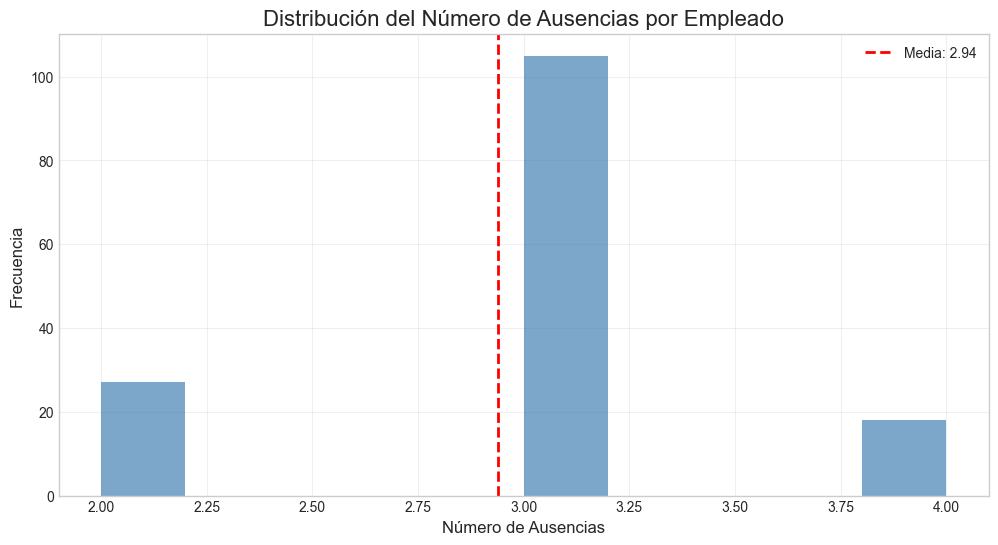

In [22]:

# Visualizar la distribución de ausencias por empleado
ausencias_por_empleado_calc = np.sum(matriz_ausencias, axis=1)

# Estadísticas de ausencia por empleado
print("   - Estadísticas de ausencia por empleado:")
print(f"     * Media: {np.mean(ausencias_por_empleado_calc):.2f}")
print(f"     * Desviación estándar: {np.std(ausencias_por_empleado_calc):.2f}")
print(f"     * Mínimo: {np.min(ausencias_por_empleado_calc)}")
print(f"     * Máximo: {np.max(ausencias_por_empleado_calc)}")

# Visualización de la distribución
plt.figure(figsize=(12, 6))
plt.hist(ausencias_por_empleado_calc, bins=10, alpha=0.7, color='steelblue')
plt.axvline(np.mean(ausencias_por_empleado_calc), color='red', linestyle='dashed', linewidth=2, label=f'Media: {np.mean(ausencias_por_empleado_calc):.2f}')
plt.title('Distribución del Número de Ausencias por Empleado')
plt.xlabel('Número de Ausencias')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.legend()
#plt.savefig('./img/imgdistribucion_ausencias.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

In [23]:
# ===============================================
# 2. DESCOMPOSICIÓN EN VALORES SINGULARES (SVD)
# ===============================================

# Aplicar SVD a la matriz de ausencias
print("\n4. DESCOMPOSICIÓN EN VALORES SINGULARES (SVD)")
print("   - Aplicando SVD a la matriz de ausencias...")

U, S, Vt = np.linalg.svd(matriz_ausencias, full_matrices=False)

# Examinar los valores singulares
print(f"   - Número de valores singulares: {len(S)}")
print(f"   - Valores singulares más importantes: {S[:5]}")


4. DESCOMPOSICIÓN EN VALORES SINGULARES (SVD)
   - Aplicando SVD a la matriz de ausencias...
   - Número de valores singulares: 90
   - Valores singulares más importantes: [4.32504505 3.7320592  3.54345032 3.52372697 3.44147395]


In [24]:
# Energía acumulada
energia_total = np.sum(S**2)
energia_acumulada = np.cumsum(S**2) / energia_total

print("   - Energía capturada por los primeros valores singulares:")
for k in [1, 2, 3, 5, 10, 20]:
    if k < len(S):
        print(f"     * Primeros {k} valores singulares: {energia_acumulada[k-1]*100:.2f}%")

   - Energía capturada por los primeros valores singulares:
     * Primeros 1 valores singulares: 4.24%
     * Primeros 2 valores singulares: 7.40%
     * Primeros 3 valores singulares: 10.25%
     * Primeros 5 valores singulares: 15.75%
     * Primeros 10 valores singulares: 28.62%
     * Primeros 20 valores singulares: 49.23%


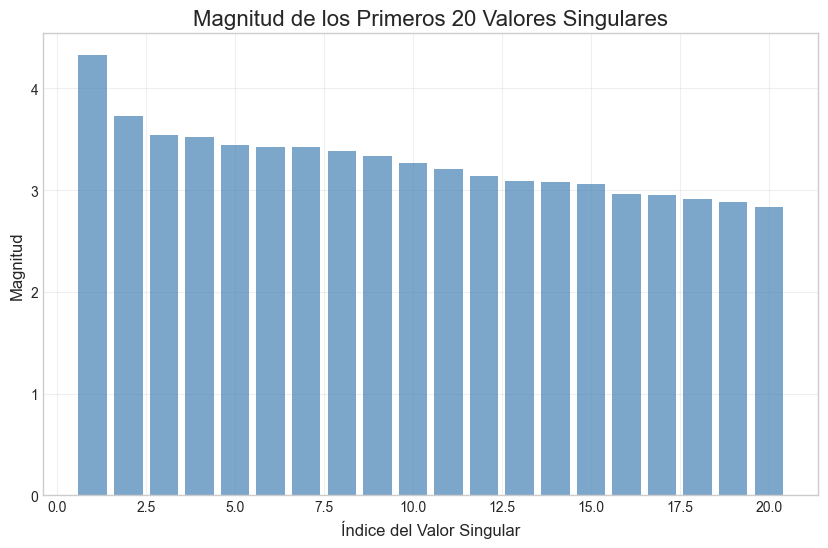

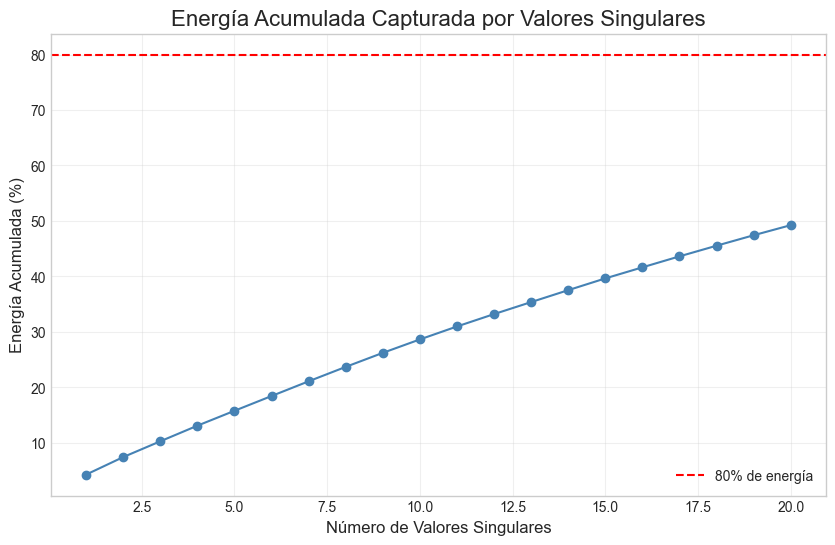

In [25]:
# Visualizar valores singulares
plt.figure(figsize=(10, 6))
plt.bar(range(1, min(21, len(S)+1)), S[:20], alpha=0.7, color='steelblue')
plt.title('Magnitud de los Primeros 20 Valores Singulares')
plt.xlabel('Índice del Valor Singular')
plt.ylabel('Magnitud')
plt.grid(True, alpha=0.3)
#plt.savefig('./img/valores_singulares.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

# Visualizar energía acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, min(21, len(energia_acumulada)+1)), energia_acumulada[:20]*100, marker='o', linestyle='-', color='steelblue')
plt.axhline(y=80, color='red', linestyle='dashed', label='80% de energía')
plt.title('Energía Acumulada Capturada por Valores Singulares')
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Energía Acumulada (%)')
plt.grid(True, alpha=0.3)
plt.legend()
#plt.savefig('./img/energia_acumulada.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

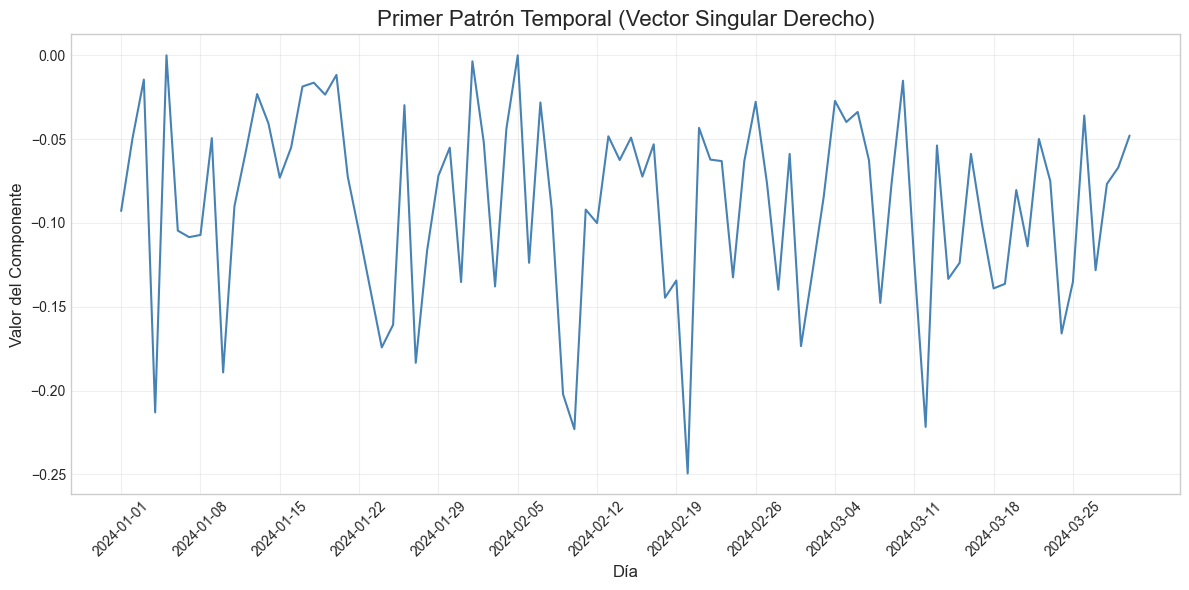

In [26]:
# ===============================================
# 3. ANÁLISIS DE PATRONES TEMPORALES
# ===============================================

# Visualizar el patrón temporal (primer componente del SVD)
primer_patron_temporal = Vt[0, :]
dias_indices = np.arange(len(primer_patron_temporal))
fechas_formateadas = [datetime.strftime(FECHA_INICIO + timedelta(days=int(i)), '%Y-%m-%d') for i in dias_indices]

plt.figure(figsize=(12, 6))
plt.plot(dias_indices, primer_patron_temporal, color='steelblue')
plt.title('Primer Patrón Temporal (Vector Singular Derecho)')
plt.xlabel('Día')
plt.ylabel('Valor del Componente')
plt.xticks(np.arange(0, len(dias_indices), 7), fechas_formateadas[::7], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('./img/patron_temporal.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

In [27]:
# Análisis por día de la semana
print("\n5. ANÁLISIS POR DÍA DE LA SEMANA")
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear una matriz para tasas de ausencia por día de la semana y área
matriz_dia_semana = np.zeros((len(AREAS), len(dias_semana)))

for i, area in enumerate(AREAS):
    for j, dia in enumerate(dias_semana):
        registros_area_dia = datos_completos[(datos_completos['area'] == area) & 
                                           (datos_completos['dia_semana'] == dia)]
        if not registros_area_dia.empty:
            ausencias = registros_area_dia[registros_area_dia['es_ausencia']].shape[0]
            total = registros_area_dia.shape[0]
            matriz_dia_semana[i, j] = ausencias / total

# Convertir a DataFrame para facilitar la visualización
df_tasa_dia_semana = pd.DataFrame(matriz_dia_semana, index=AREAS, columns=dias_semana)
print("   - Matriz de tasas de ausencia por área y día de la semana:")
print(df_tasa_dia_semana)


5. ANÁLISIS POR DÍA DE LA SEMANA
   - Matriz de tasas de ausencia por área y día de la semana:
                  Monday   Tuesday  Wednesday  Thursday    Friday  Saturday  \
Almacenamiento  0.039886  0.037037   0.028490  0.019943  0.022792  0.045584   
Distribución    0.042184  0.042184   0.029777  0.027295  0.032258  0.024814   
Transporte      0.057692  0.033654   0.028846  0.028846  0.024038  0.038462   
Carga           0.028846  0.019231   0.032051  0.054487  0.019231  0.038462   
Embalaje        0.022436  0.035256   0.032051  0.025641  0.035256  0.038462   
Inventario      0.021978  0.035714   0.032967  0.030220  0.046703  0.024725   

                  Sunday  
Almacenamiento  0.024691  
Distribución    0.024194  
Transporte      0.026042  
Carga           0.041667  
Embalaje        0.027778  
Inventario      0.053571  


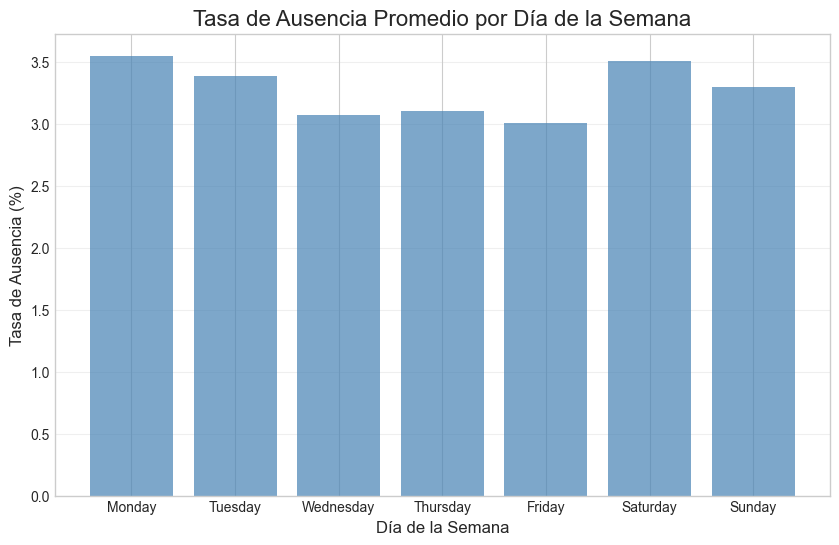

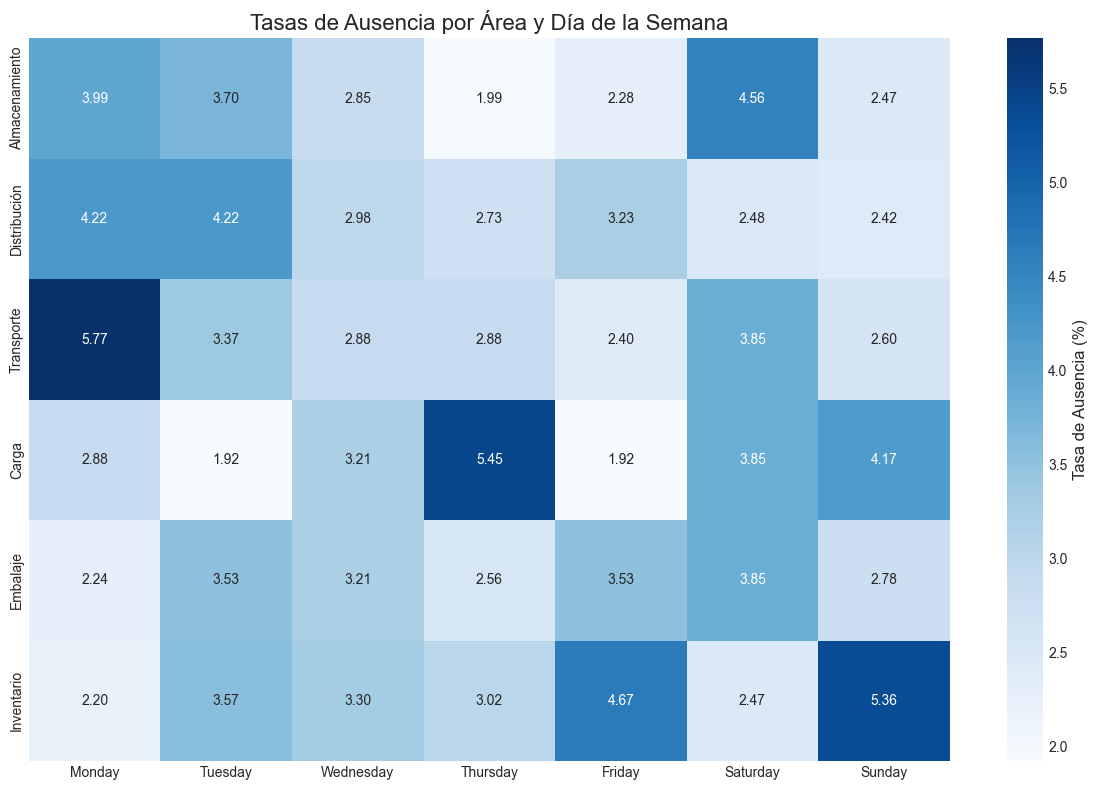

In [28]:
# Visualizar tasas por día de la semana (promedio de todas las áreas)
tasas_promedio_dia = np.mean(matriz_dia_semana, axis=0)

plt.figure(figsize=(10, 6))
plt.bar(dias_semana, tasas_promedio_dia*100, color='steelblue', alpha=0.7)
plt.title('Tasa de Ausencia Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Tasa de Ausencia (%)')
plt.grid(True, axis='y', alpha=0.3)
plt.savefig('./img/ausencia_por_dia.png', dpi=300, bbox_inches='tight')

# Visualizar tasas por área y día (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(df_tasa_dia_semana*100, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Tasa de Ausencia (%)'})
plt.title('Tasas de Ausencia por Área y Día de la Semana')
plt.tight_layout()
#plt.savefig('./img/heatmap_area_dia.png', dpi=300, bbox_inches='tight')
#plt.close()

In [29]:
# ===============================================
# 4. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
# ===============================================

print("\n6. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")

# Centrar los datos (restar la media de cada columna)
matriz_ausencias_centrada = matriz_ausencias - np.mean(matriz_ausencias, axis=0)

# Calcular la matriz de covarianza
matriz_cov = matriz_ausencias_centrada.T @ matriz_ausencias_centrada / (len(ids_empleados) - 1)

# Obtener valores y vectores propios
valores_propios, vectores_propios = np.linalg.eig(matriz_cov)

# Ordenar por magnitud descendente
idx = np.argsort(valores_propios)[::-1]
valores_propios = valores_propios[idx].real  # Asegurar valores reales
vectores_propios = vectores_propios[:, idx]

# Mostrar la varianza explicada por cada componente principal
varianza_total = np.sum(valores_propios)
varianza_explicada = valores_propios / varianza_total
varianza_acumulada = np.cumsum(varianza_explicada)

print("   - Varianza explicada por componentes principales:")
for i in range(min(5, len(valores_propios))):
    print(f"     * PC{i+1}: {varianza_explicada[i]*100:.2f}% (acumulado: {varianza_acumulada[i]*100:.2f}%)")


6. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
   - Varianza explicada por componentes principales:
     * PC1: 3.29% (acumulado: 3.29%)
     * PC2: 2.98% (acumulado: 6.27%)
     * PC3: 2.93% (acumulado: 9.20%)
     * PC4: 2.80% (acumulado: 12.01%)
     * PC5: 2.79% (acumulado: 14.80%)


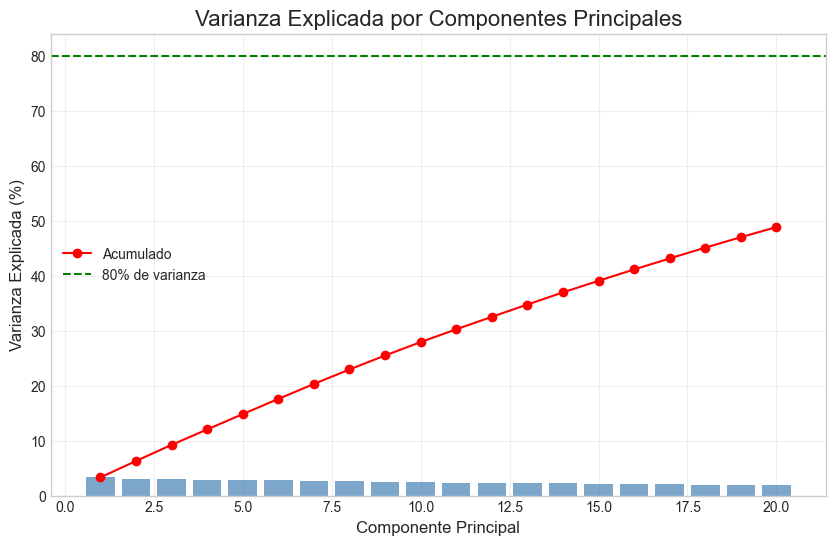

In [30]:
# Visualizar varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, min(21, len(varianza_explicada)+1)), varianza_explicada[:20]*100, alpha=0.7, color='steelblue')
plt.plot(range(1, min(21, len(varianza_acumulada)+1)), varianza_acumulada[:20]*100, marker='o', color='red', linestyle='-', label='Acumulado')
plt.axhline(y=80, color='green', linestyle='dashed', label='80% de varianza')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.legend()
plt.grid(True, alpha=0.3)
#plt.savefig('./img/varianza_explicada.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

In [31]:
# ===============================================
# 5. CORRELACIÓN ENTRE ÁREAS
# ===============================================

print("\n7. ANÁLISIS DE CORRELACIÓN ENTRE ÁREAS")

# Crear matriz de ausencias por área y día
matriz_ausencia_por_area = np.zeros((len(AREAS), len(fechas)))

for i, area in enumerate(AREAS):
    for j, fecha in enumerate(fechas):
        registros_area = datos_completos[(datos_completos['area'] == area) & 
                                       (datos_completos['fecha'] == fecha)]
        if not registros_area.empty:
            ausencias = registros_area[registros_area['es_ausencia']].shape[0]
            total = registros_area.shape[0]
            matriz_ausencia_por_area[i, j] = ausencias / total if total > 0 else 0

# Calcular matriz de correlación entre áreas
matriz_correlacion = np.corrcoef(matriz_ausencia_por_area)
df_correlacion = pd.DataFrame(matriz_correlacion, index=AREAS, columns=AREAS)

print("   - Matriz de correlación entre áreas:")
print(df_correlacion)


7. ANÁLISIS DE CORRELACIÓN ENTRE ÁREAS
   - Matriz de correlación entre áreas:
                Almacenamiento  Distribución  Transporte     Carga  Embalaje  \
Almacenamiento        1.000000      0.012202    0.012201 -0.011598 -0.009473   
Distribución          0.012202      1.000000    0.069301 -0.148826 -0.105262   
Transporte            0.012201      0.069301    1.000000  0.012240  0.043642   
Carga                -0.011598     -0.148826    0.012240  1.000000 -0.084432   
Embalaje             -0.009473     -0.105262    0.043642 -0.084432  1.000000   
Inventario           -0.234417     -0.033779    0.092353 -0.038128  0.082290   

                Inventario  
Almacenamiento   -0.234417  
Distribución     -0.033779  
Transporte        0.092353  
Carga            -0.038128  
Embalaje          0.082290  
Inventario        1.000000  


In [32]:
# Identificar las áreas con mayor correlación
max_corr = 0
max_areas = ("", "")
for i in range(len(AREAS)):
    for j in range(i+1, len(AREAS)):
        if matriz_correlacion[i, j] > max_corr:
            max_corr = matriz_correlacion[i, j]
            max_areas = (AREAS[i], AREAS[j])

print(f"   - Las áreas con mayor correlación son: {max_areas[0]} y {max_areas[1]} (r = {max_corr:.2f})")

   - Las áreas con mayor correlación son: Transporte y Inventario (r = 0.09)


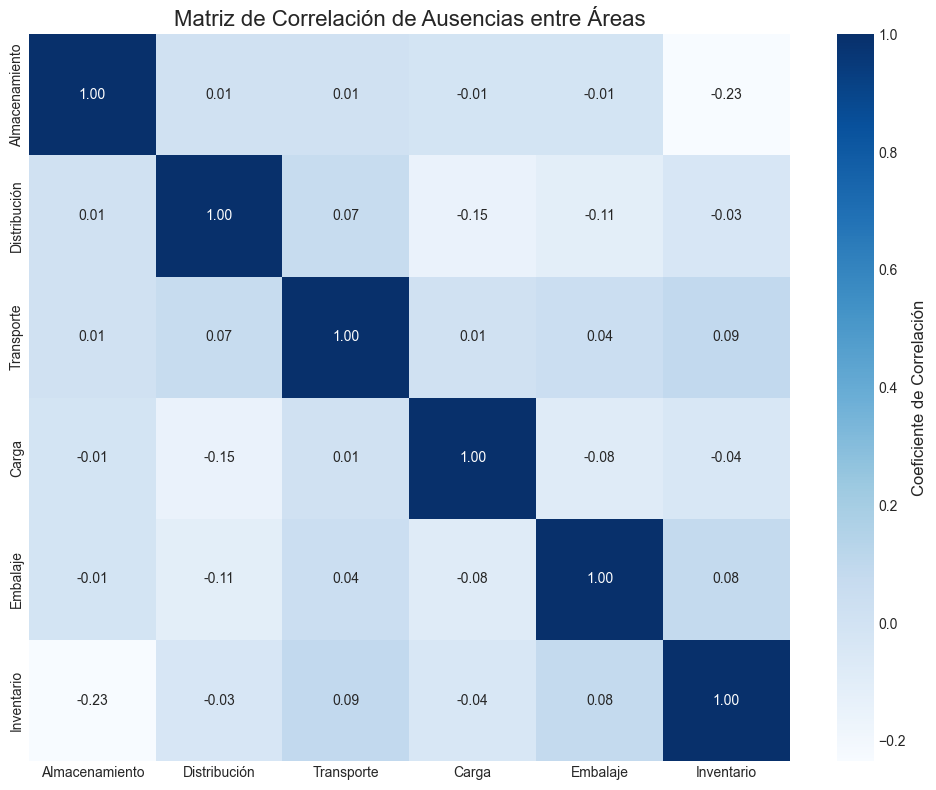

In [33]:
# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlacion, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación de Ausencias entre Áreas')
plt.tight_layout()
#plt.savefig('./img/matriz_correlacion.png', dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

In [34]:
# ===============================================
# 6. MODELO PREDICTIVO CON REGRESIÓN LINEAL
# ===============================================

print("\n8. MODELO PREDICTIVO PARA TASAS DE AUSENCIA")

# Creamos series temporales de tasas de ausencia por día
tasas_diarias = []
for fecha in fechas:
    registros_dia = datos_completos[datos_completos['fecha'] == fecha]
    ausencias = sum(registros_dia['es_ausencia'])
    total = len(registros_dia)
    tasa = ausencias / total
    dia_semana = registros_dia.iloc[0]['dia_semana']
    tasas_diarias.append({
        'fecha': fecha,
        'tasa': tasa,
        'dia_semana': dia_semana
    })

df_tasas = pd.DataFrame(tasas_diarias)


8. MODELO PREDICTIVO PARA TASAS DE AUSENCIA


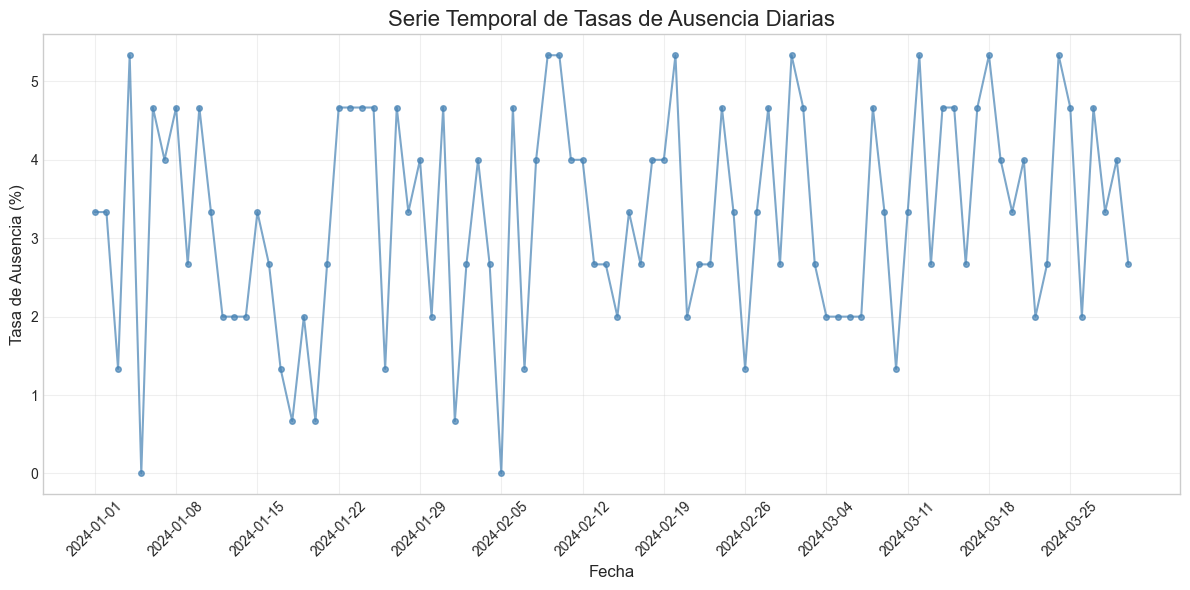

In [ ]:
# Visualizar serie temporal de tasas de ausencia
plt.figure(figsize=(12, 6))
plt.plot(df_tasas['fecha'], df_tasas['tasa']*100, marker='o', markersize=4, linestyle='-', 
         alpha=0.7, color='steelblue')
plt.title('Serie Temporal de Tasas de Ausencia Diarias')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Ausencia (%)')
plt.xticks(df_tasas['fecha'][::7], df_tasas['fecha'].dt.strftime('%Y-%m-%d')[::7], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig('./img/serie_temporal_ausencias.png', dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

In [36]:
# Crear modelo predictivo basado en álgebra lineal

# 1. Preparar datos para regresión
# Crear características: día de la semana (one-hot) y valores rezagados
# Usaremos los últimos 7 días para predecir el siguiente

# Codificar el día de la semana usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
dias_semana_codificados = encoder.fit_transform(df_tasas[['dia_semana']])

# Crear matriz X con días codificados y valores rezagados
X = np.zeros((len(df_tasas) - 7, 7 + 7))  # 7 días + 7 valores rezagados

for i in range(7, len(df_tasas)):
    # One-hot encoding para día de la semana
    X[i-7, :7] = dias_semana_codificados[i]
    
    # Valores rezagados (7 días anteriores)
    for j in range(7):
        X[i-7, 7+j] = df_tasas.iloc[i-j-1]['tasa']

y = df_tasas.iloc[7:]['tasa'].values

In [37]:
# 2. Solucionar el sistema lineal usando SVD
# Podemos usar la descomposición SVD para encontrar solución estable
U_X, S_X, Vt_X = np.linalg.svd(X, full_matrices=False)
S_X_inv = np.diag(1 / S_X)
w_svd = Vt_X.T @ S_X_inv @ U_X.T @ y

print("   - Coeficientes del modelo predictivo:")
print("     * Coeficientes para días de la semana:")
for i, dia in enumerate(encoder.categories_[0]):
    print(f"       - {dia}: {w_svd[i]:.4f}")
print("     * Coeficientes para valores rezagados:")
for i in range(7):
    print(f"       - Rezago {i+1}: {w_svd[7+i]:.4f}")

   - Coeficientes del modelo predictivo:
     * Coeficientes para días de la semana:
       - Friday: 0.0299
       - Monday: 0.0293
       - Saturday: 0.0305
       - Sunday: 0.0300
       - Thursday: 0.0265
       - Tuesday: 0.0308
       - Wednesday: 0.0276
     * Coeficientes para valores rezagados:
       - Rezago 1: 0.2109
       - Rezago 2: 0.0206
       - Rezago 3: 0.0589
       - Rezago 4: 0.0115
       - Rezago 5: -0.3272
       - Rezago 6: 0.2369
       - Rezago 7: -0.1052


In [38]:
# 3. Generar pronósticos para los siguientes 14 días
ultima_fecha = fechas[-1]
tasas_recientes = df_tasas.iloc[-7:]['tasa'].values
pronosticos = []

for i in range(1, 15):
    fecha_pronostico = ultima_fecha + timedelta(days=i)
    dia_semana = fecha_pronostico.strftime('%A')
    
    # Codificar día de la semana
    dia_codificado = encoder.transform([[dia_semana]])
    
    # Crear vector de características
    x_nuevo = np.zeros(14)
    x_nuevo[:7] = dia_codificado[0]
    x_nuevo[7:] = tasas_recientes
    
    # Predecir
    tasa_predicha = np.dot(x_nuevo, w_svd)
    
    pronosticos.append({
        'fecha': fecha_pronostico,
        'dia_semana': dia_semana,
        'tasa_predicha': tasa_predicha
    })
    
    # Actualizar tasas recientes para próxima predicción
    tasas_recientes = np.roll(tasas_recientes, -1)
    tasas_recientes[-1] = tasa_predicha

df_pronosticos = pd.DataFrame(pronosticos)

c:\Users\ingen\Documents\proyectos\proyecto_exedatasc\exe_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\ingen\Documents\proyectos\proyecto_exedatasc\exe_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\ingen\Documents\proyectos\proyecto_exedatasc\exe_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\ingen\Documents\proyectos\proyecto_exedatasc\exe_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\ingen\Documents\proyectos\proyecto_exedatasc\exe_env\Lib\site-packages\skle

In [39]:
# Visualizar pronósticos
print("\n9. PRONÓSTICO DE TASAS DE AUSENCIA")
print("   - Pronósticos para los próximos 14 días:")
for i, row in df_pronosticos.iterrows():
    print(f"     * {row['fecha'].strftime('%Y-%m-%d')} ({row['dia_semana']}): {row['tasa_predicha']*100:.2f}%")


9. PRONÓSTICO DE TASAS DE AUSENCIA
   - Pronósticos para los próximos 14 días:
     * 2024-03-31 (Sunday): 3.97%
     * 2024-04-01 (Monday): 3.17%
     * 2024-04-02 (Tuesday): 3.58%
     * 2024-04-03 (Wednesday): 3.15%
     * 2024-04-04 (Thursday): 3.12%
     * 2024-04-05 (Friday): 3.41%
     * 2024-04-06 (Saturday): 3.27%
     * 2024-04-07 (Sunday): 3.59%
     * 2024-04-08 (Monday): 3.17%
     * 2024-04-09 (Tuesday): 3.57%
     * 2024-04-10 (Wednesday): 2.92%
     * 2024-04-11 (Thursday): 3.12%
     * 2024-04-12 (Friday): 3.22%
     * 2024-04-13 (Saturday): 3.48%


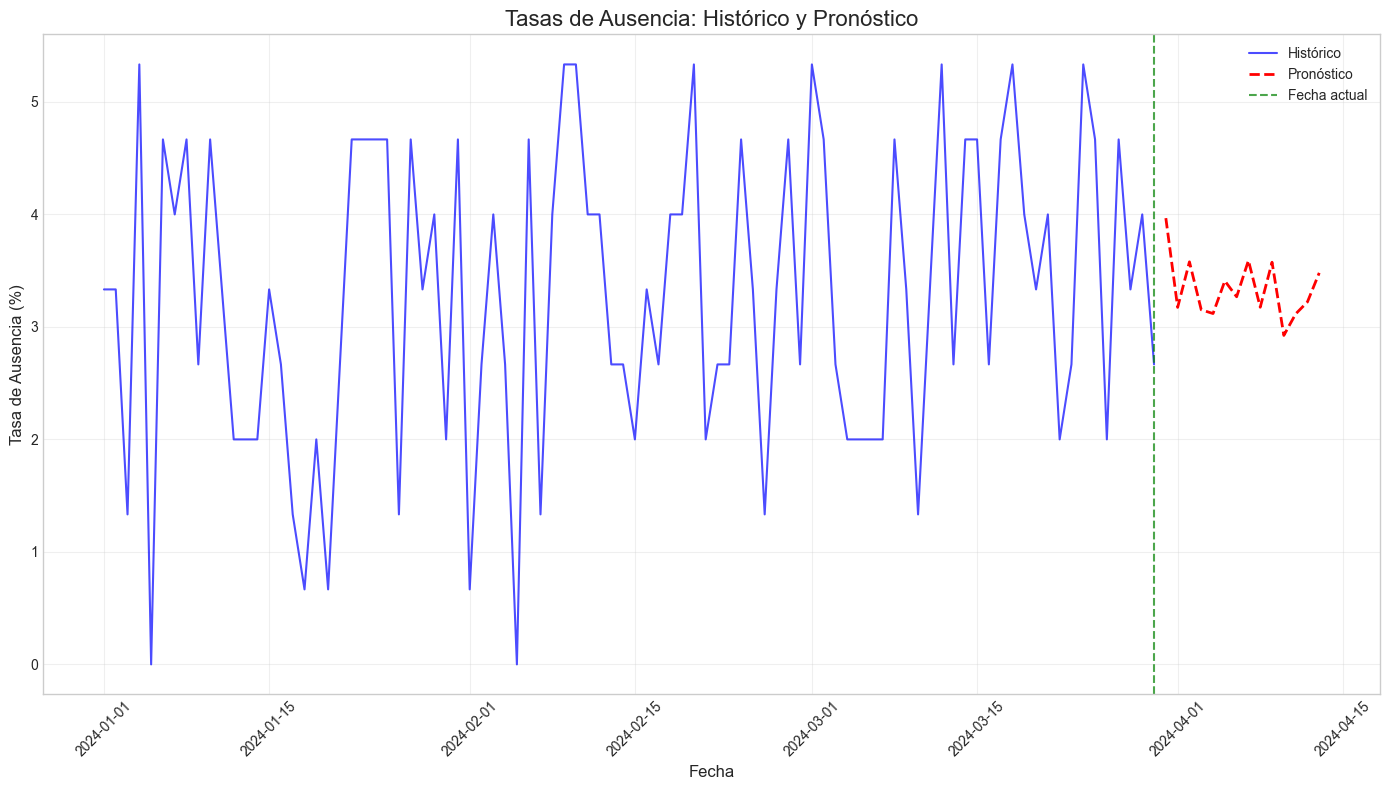

In [40]:
# Combinar histórico y pronósticos para visualización
fechas_historicas = df_tasas['fecha']
tasas_historicas = df_tasas['tasa']
fechas_pronostico = df_pronosticos['fecha']
tasas_pronostico = df_pronosticos['tasa_predicha']

plt.figure(figsize=(14, 8))
plt.plot(fechas_historicas, tasas_historicas*100, 'b-', label='Histórico', alpha=0.7)
plt.plot(fechas_pronostico, tasas_pronostico*100, 'r--', label='Pronóstico', linewidth=2)
plt.axvline(x=ultima_fecha, color='green', linestyle='--', label='Fecha actual', alpha=0.7)
plt.title('Tasas de Ausencia: Histórico y Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Ausencia (%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('./img/pronostico_ausencias.png', dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

In [41]:
# ===============================================
# 7. CONCLUSIONES DEL ANÁLISIS
# ===============================================

print("\n10. CONCLUSIONES DEL ANÁLISIS")
print(f"   - Tasa promedio de ausencia: {np.mean(matriz_ausencias)*100:.2f}%")
print(f"   - Los primeros 5 componentes principales explican {varianza_acumulada[4]*100:.2f}% de la varianza")
print(f"   - El día con mayor tasa de ausencia es: {dias_semana[np.argmax(np.mean(matriz_dia_semana, axis=0))]}")
print(f"   - Las áreas con mayor correlación de ausencias son: {max_areas[0]} y {max_areas[1]}")
print("   - El modelo predictivo basado en álgebra lineal captura tanto los patrones cíclicos semanales como las tendencias recientes")


10. CONCLUSIONES DEL ANÁLISIS
   - Tasa promedio de ausencia: 3.27%
   - Los primeros 5 componentes principales explican 14.80% de la varianza
   - El día con mayor tasa de ausencia es: Monday
   - Las áreas con mayor correlación de ausencias son: Transporte y Inventario
   - El modelo predictivo basado en álgebra lineal captura tanto los patrones cíclicos semanales como las tendencias recientes


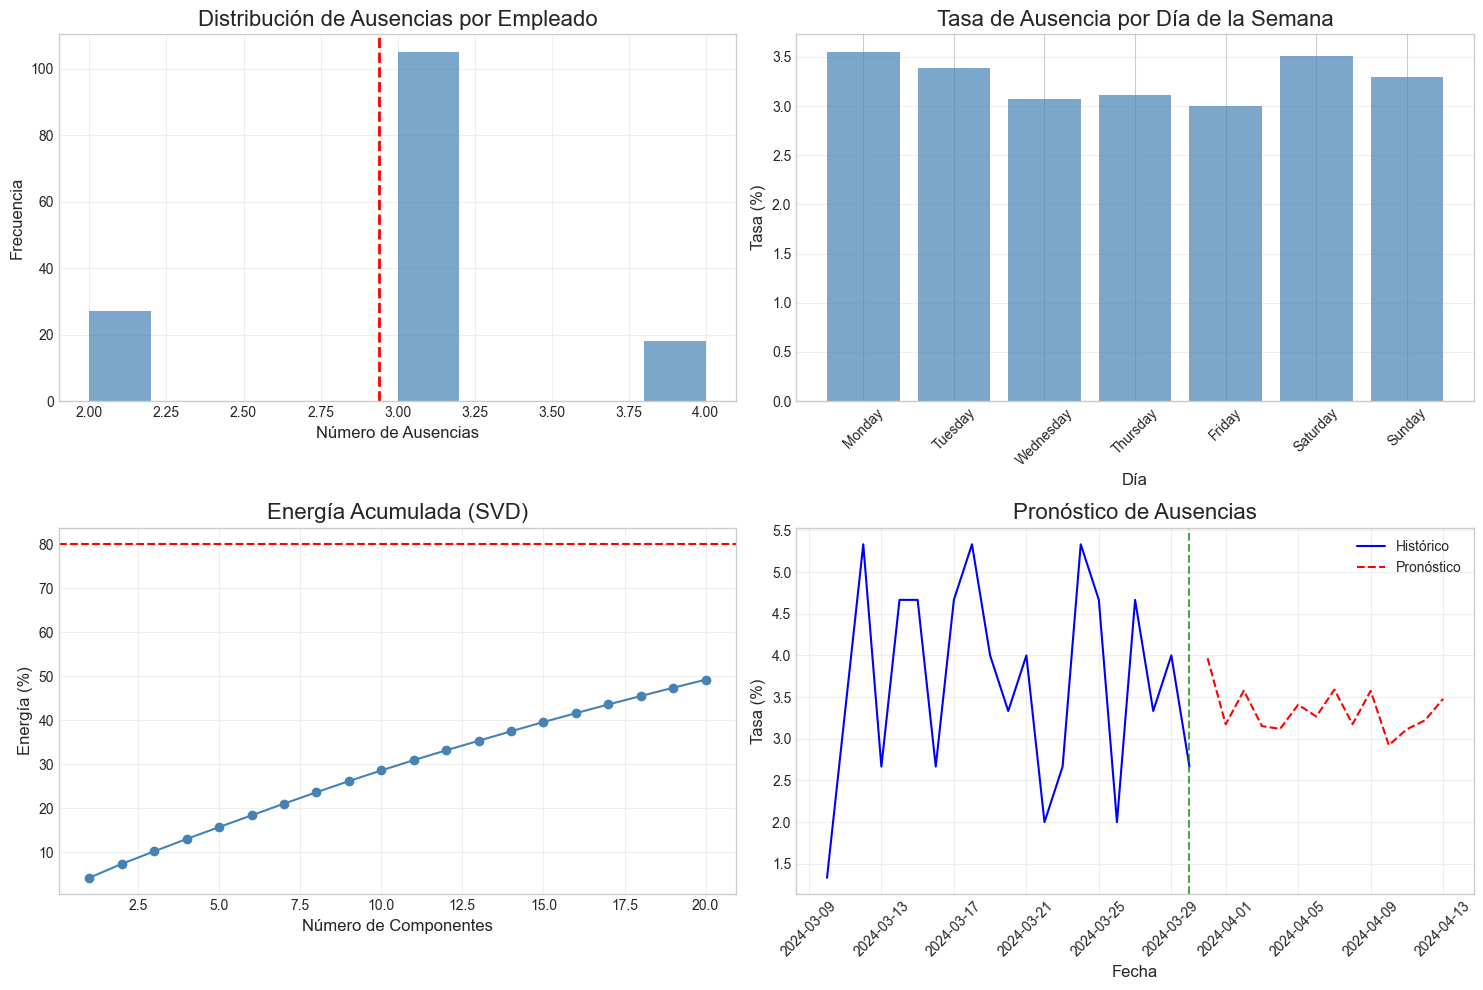

In [42]:
# Visualización resumen
plt.figure(figsize=(15, 10))

# Subplot 1: Distribución de ausencias
plt.subplot(2, 2, 1)
plt.hist(ausencias_por_empleado_calc, bins=10, alpha=0.7, color='steelblue')
plt.axvline(np.mean(ausencias_por_empleado_calc), color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de Ausencias por Empleado')
plt.xlabel('Número de Ausencias')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# Subplot 2: Tasas por día de la semana
plt.subplot(2, 2, 2)
plt.bar(dias_semana, tasas_promedio_dia*100, color='steelblue', alpha=0.7)
plt.title('Tasa de Ausencia por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Tasa (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)

# Subplot 3: Energía acumulada SVD
plt.subplot(2, 2, 3)
plt.plot(range(1, min(21, len(energia_acumulada)+1)), energia_acumulada[:20]*100, marker='o', linestyle='-', color='steelblue')
plt.axhline(y=80, color='red', linestyle='dashed')
plt.title('Energía Acumulada (SVD)')
plt.xlabel('Número de Componentes')
plt.ylabel('Energía (%)')
plt.grid(True, alpha=0.3)

# Subplot 4: Pronóstico
plt.subplot(2, 2, 4)
ultimos_dias = 21
plt.plot(fechas_historicas[-ultimos_dias:], tasas_historicas[-ultimos_dias:]*100, 'b-', label='Histórico')
plt.plot(fechas_pronostico[:14], tasas_pronostico[:14]*100, 'r--', label='Pronóstico')
plt.axvline(x=ultima_fecha, color='green', linestyle='--', alpha=0.7)
plt.title('Pronóstico de Ausencias')
plt.xlabel('Fecha')
plt.ylabel('Tasa (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('./img/resumen_analisis.png', dpi=300, bbox_inches='tight')
# plt.close()
plt.show()



In [43]:
print("\nEl análisis con álgebra lineal ha permitido:")
print("1. Representar los datos de ausentismo como matrices")
print("2. Descubrir patrones subyacentes mediante SVD")
print("3. Cuantificar la relación entre áreas mediante productos matriciales")
print("4. Construir un modelo predictivo mediante la solución de sistemas lineales")
print("5. Visualizar tendencias y patrones para facilitar la toma de decisiones")
print("\nTodas las visualizaciones han sido guardadas como archivos PNG.")


El análisis con álgebra lineal ha permitido:
1. Representar los datos de ausentismo como matrices
2. Descubrir patrones subyacentes mediante SVD
3. Cuantificar la relación entre áreas mediante productos matriciales
4. Construir un modelo predictivo mediante la solución de sistemas lineales
5. Visualizar tendencias y patrones para facilitar la toma de decisiones

Todas las visualizaciones han sido guardadas como archivos PNG.
